<a href="https://colab.research.google.com/github/CShorten/CORD-19-Mining/blob/main/How_Papers_Are_Stored.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> How CORD-19 stored Papers </h2>

This notebook explores what information is contained in this dataset

<h4> Read a Sample Paper (Json Data) </h4>

I'm storing this paper locally, sampled from CORD-19

In [ ]:
from google.colab import files
files.upload()

In [9]:
import json

with open('CORD_Sample.json') as jsonfile:
  paper_dict = json.load(jsonfile)

In [15]:
print(paper_dict.keys())

dict_keys(['paper_id', 'metadata', 'abstract', 'body_text', 'bib_entries', 'ref_entries', 'back_matter'])


<h4> Starting with the Abstract </h4>

Firstly, note the format of the JSON file.
<li>Each paper is stored as a dictionary with these keys shown above.</li>
<li>Each entry such as 'abstract' is a list containing dictionaries.</li>
<li>In the abstract, there is only one such dicitonary.</li>
<li>The body text has a few of these dictionaries for each paragraph.</li>

In [17]:
print(type(paper_dict['abstract']))

<class 'list'>


In [23]:
paper_dict['abstract']

[{'cite_spans': [],
  'ref_spans': [],
  'section': 'Abstract',
  'text': 'Bacille Calmette-Guérin (BCG) is an attenuated strain of Mycobacterium bovis currently used as a vaccine against tuberculosis. Global distribution and propagation of BCG has contributed to the in vitro evolution of the vaccine strain and is thought to partially account for the different outcomes of BCG vaccine trials. Previous efforts by several molecular techniques effectively identified large sequence polymorphisms among BCG daughter strains, but lacked the resolution to identify smaller changes. In this study, we have used a NimbleGen tiling array for whole genome comparison of 13 BCG strains. Using this approach, in tandem with DNA resequencing, we have identified six novel large sequence polymorphisms including four deletions and two duplications in specific BCG strains. Moreover, we have uncovered various polymorphisms in the phoP-phoR locus. Importantly, these polymorphisms affect genes encoding establish

In [21]:
print(type(paper_dict['abstract'][0]))

dict

In [24]:
abstract_data = paper_dict['abstract'][0]
abstract_data.keys()

dict_keys(['text', 'cite_spans', 'ref_spans', 'section'])

In [26]:
print(abstract_data['text'])

Bacille Calmette-Guérin (BCG) is an attenuated strain of Mycobacterium bovis currently used as a vaccine against tuberculosis. Global distribution and propagation of BCG has contributed to the in vitro evolution of the vaccine strain and is thought to partially account for the different outcomes of BCG vaccine trials. Previous efforts by several molecular techniques effectively identified large sequence polymorphisms among BCG daughter strains, but lacked the resolution to identify smaller changes. In this study, we have used a NimbleGen tiling array for whole genome comparison of 13 BCG strains. Using this approach, in tandem with DNA resequencing, we have identified six novel large sequence polymorphisms including four deletions and two duplications in specific BCG strains. Moreover, we have uncovered various polymorphisms in the phoP-phoR locus. Importantly, these polymorphisms affect genes encoding established virulence factors including cell wall complex lipids, ESX secretion syst

<h3> We are interested in truncating the length of these text passages </h3>

In [27]:
print(len(abstract_data['text']))

1374


<h4> There are <b> 1374 words </b> in the abstract! </h4>

<h4> Let's see the story with a sampled paragraph from the paper </h4>
Again, this is stored as a list of dictionaries.
<br /><br />
Each entry in the list corresponds to a sampled paragraph in the paper

In [36]:
body_text = paper_dict['body_text']
type(body_text)

list

In [38]:
len(body_text)

39

There are 39 paragraphs contained in the body text

In [40]:
body_text[0]['text']

'Bacille Calmette-Guérin (BCG) is an attenuated strain of Mycobacterium bovis and is the only available vaccine against tuberculosis (TB). Since 1974, BCG vaccination has been included in the World Health Organization (WHO) Expanded Program on Immunization. It is estimated that more than 3 billion individuals have been immunized with BCG and over 100 million doses of BCG are administered annually. Multiple studies have confirmed that BCG is generally safe and can protect children against disseminated disease, including tuberculosis meningitis [1, 2] . BCG also provides cross-protection against leprosy [3] . However, the success of BCG against pulmonary TB in adults is still debated, since randomized clini-cal trials have reported protection efficacy ranging from 0-80% [4, 5] . Several hypotheses for the variation in observed efficacy have been proposed [6] [7] [8] [9] .'

In [41]:
body_text[38]['text']

'ASL, VT, ZW, and XY performed the experiments and participated in data analysis. DCA participated in data analysis and co-authored the manuscript. GFG oversaw the experiments. BZ oversaw the experiments and participated in data analysis. JL oversaw the experiments, analyzed the data, and wrote the manuscript.'

Length distribution of paragraphs in the body text

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [56]:
lengths = []
for i in range(len(body_text)):
  lengths.append(len(body_text[i]['text']))

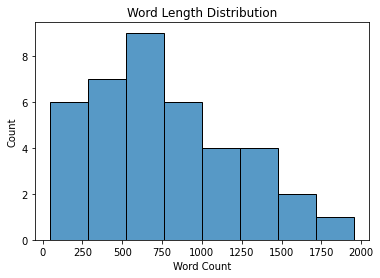

In [64]:
lengths = np.array(lengths)
plt.title('Word Length Distribution')
plt.xlabel('Word Count')
plt.ylabel('Count')
sns.histplot(lengths, bins=8);

Word Frequency Distribution (For this one paper)

In [70]:
body_text[0]['text'].split(' ')[0]

'Bacille'

In [67]:
word_count_dict = {}
for i in range(len(body_text)):
  paragraph = body_text[i]['text']
  paragraph = paragraph.split(' ')
  for word in range(len(paragraph)):

    if word in word_count_dict:
      word_count_dict[word] += 1
    else:
      word_count_dict[word] = 1


Bigram Frequency Distribution (For this one paper)